# **Phone Call Marketing Campaign**

<img src="https://cdn.searchenginejournal.com/wp-content/uploads/2020/01/shutterstock_181457837-5e3199d4b1202.png" >

# **Term Deposit Subscription Prediction**

- **Kwanda Mazibuko**

## Table of contents
1. [Introduction](#intro)
2. [Data Collection](#data)
3. [Data Preprocessing](#cleaning)
4. [Exploratory Data Analysis](#EDA)
5. [Feature Engineering And Selection](#features)
6. [Model Building And Evaluation](#model)
7. [Model Hyperparameter Tuning](#tuning)
8. [Conclusion](#conclusion)
9. [References](#references)

<a id="intro"></a>
# 1. **Introduction**

**Problem Statement**

As we are diving deep into the field of artificial intelligence, we are coming across ways in which AI can leverage human life and potentially save them from disasters in the coming future. One such small step towards this far but promising future is to use data from past and find some patterns which are universal in nature and which can promise some accurate prediction thereby helping humans minimize the effects of disaster.


There has been a revenue decline for the bank and they would like to know what actions to take. After investigation, it was found that the root cause is that their clients are not depositing as frequently as before. Term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can lend more and thus make more profits. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues.


**Objective**

We build a machine learning model to predict if the clients will subscribe a term deposit. 

<a id="data"></a>
# 2. **Data Collection**

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.

# **Importing Libraries**

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from statsmodels.graphics.correlation import plot_corr
from scipy.stats import skew
from scipy.stats import kurtosis
import statistics

# datetime
import datetime

# Libraries for data preparation and model building
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from sklearn import metrics
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from scipy.stats import boxcox, zscore
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures

# saving my model
import pickle

#ignoring warnings
import warnings
warnings.filterwarnings('ignore')

#ignoring warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#making sure that we can see all rows and cols
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

C:\Users\thaba\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### **Loading Data**

In [2]:
# Read file
df_train = pd.read_csv('BankCustomerData.csv')

# view first 20 rows
df_train.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [94]:
# Checking how our training dataset looks like
print("Rows    : ", df_train.shape[0])

print("Columns : ", df_train.shape[1])

print("\nMissing values: ", df_train.isnull().sum().values.sum())

print("\nInformation about the data: ")
print("  \n", df_train.info())
 
print("\nAbout the data: \n")

# Check how many unique items are in each column of the dateframe
for col_name in df_train.columns:
    unique_out = len(df_train[col_name].unique())
    print(f"Feature '{col_name}' has {unique_out} unique categories \n") 

Rows    :  42639
Columns :  17

Missing values:  0

Information about the data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           42639 non-null  int64 
 1   job           42639 non-null  object
 2   marital       42639 non-null  object
 3   education     42639 non-null  object
 4   default       42639 non-null  object
 5   balance       42639 non-null  int64 
 6   housing       42639 non-null  object
 7   loan          42639 non-null  object
 8   contact       42639 non-null  object
 9   day           42639 non-null  int64 
 10  month         42639 non-null  object
 11  duration      42639 non-null  int64 
 12  campaign      42639 non-null  int64 
 13  pdays         42639 non-null  int64 
 14  previous      42639 non-null  int64 
 15  poutcome      42639 non-null  object
 16  term_deposit  42639 non-null  object
dtypes: int6

In [95]:
df_train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000
mean,40.788808,1331.863951,15.854781,255.957504,2.816412,34.169141,0.465442
std,10.200236,3011.537676,8.293901,258.361368,3.163564,92.041713,2.166705
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,62.000000,8.000000,101.000000,1.000000,-1.000000,0.000000
50%,39.000000,429.000000,16.000000,177.000000,2.000000,-1.000000,0.000000
75%,48.000000,1381.500000,21.000000,315.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,536.000000,275.000000


<a id="cleaning"></a>
## 3. **Data Preprocessing**

<a id="EDA"></a>
## 4. **Exploratory Data Analysis**

In [96]:
import plotly.express as px
import plotly.graph_objects as go

labels = ['yes','no']
values = [df_train[df_train['term_deposit'] == 'yes'].shape[0] , df_train[df_train['term_deposit'] == 'no'].shape[0]]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

- The data is not evenly classified. We see that not many people subscribe to the term deposit.

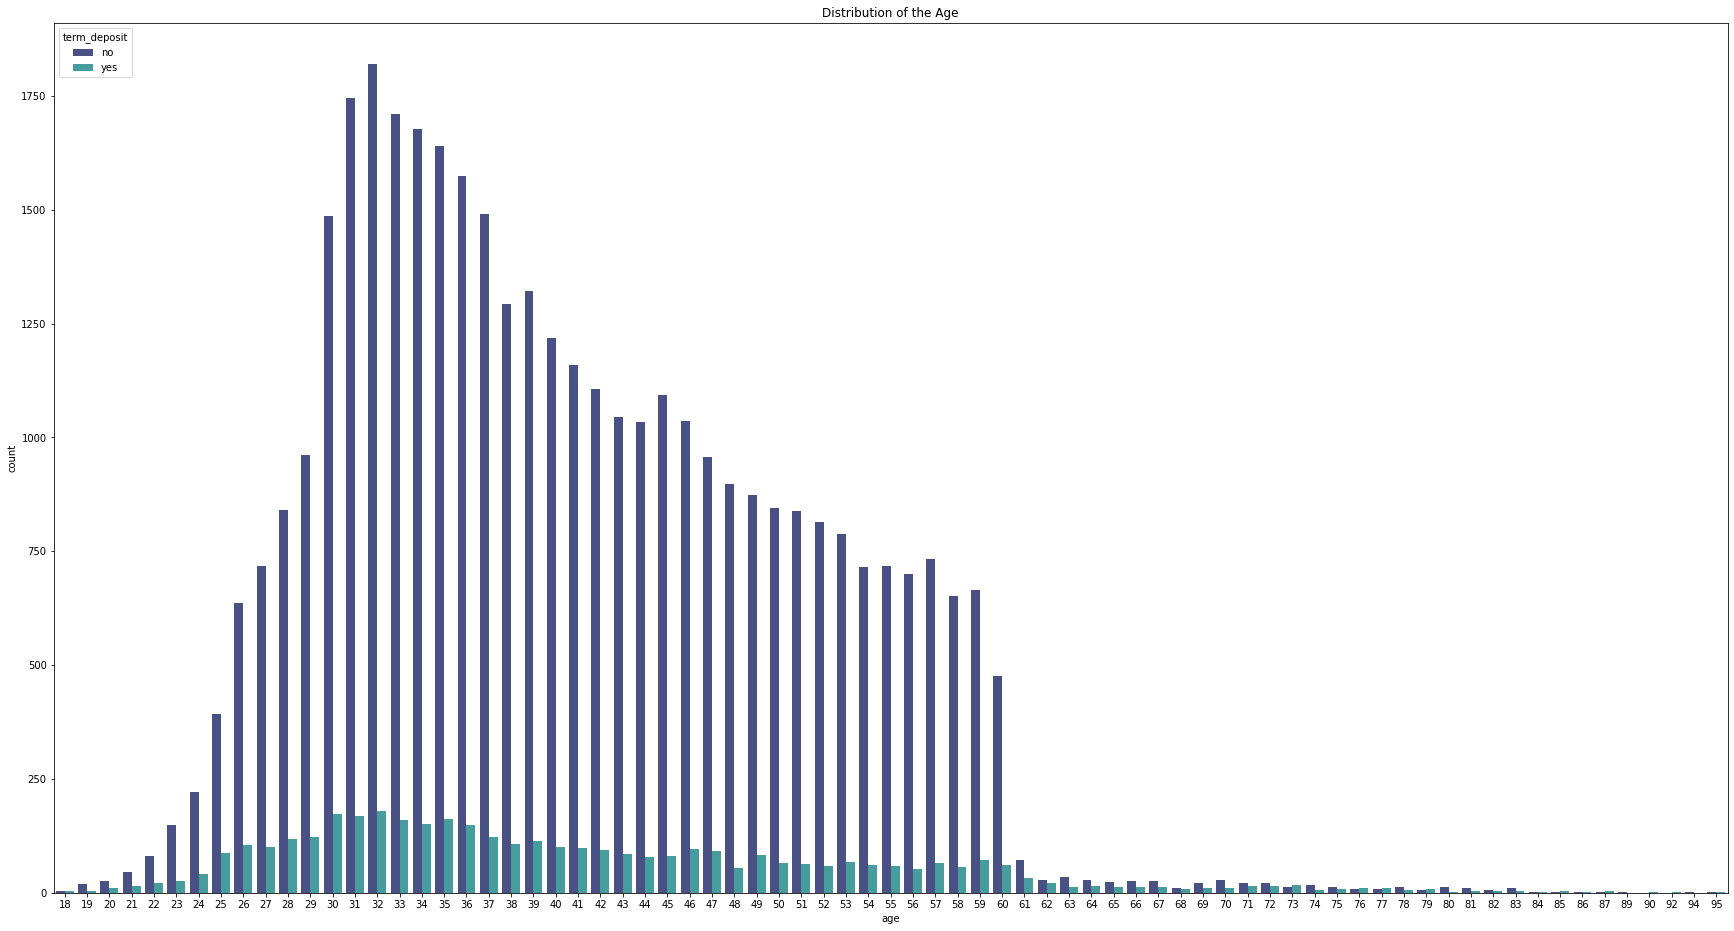

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(30, 16))

sns.countplot(x = 'age', data = df_train, hue = "term_deposit", palette = "mako")

plt.title("Job distribution");

plt.title("Distribution of the Age");

- It is clear that no so many people subscribe to term deposit especially the abouve 6o group and the one below 25. Hence it is clear that the campaign should shift its focus to only people from the age of 25 upto 60.

In [98]:
df_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'term_deposit'],
      dtype='object')

<AxesSubplot:xlabel='loan', ylabel='count'>

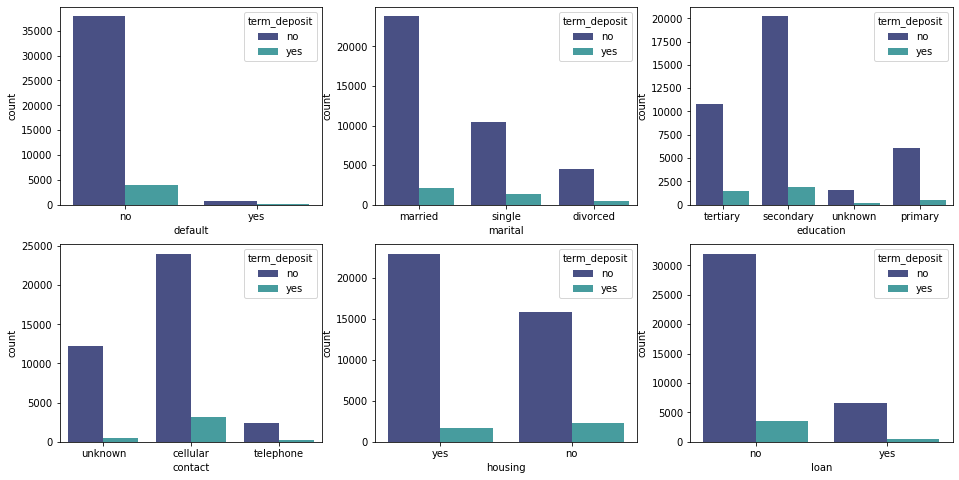

In [99]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8))

sns.countplot(x = 'default', data = df_train, hue = "term_deposit", palette = "mako", ax = ax[0,0])
sns.countplot(x = 'marital', data = df_train, hue = "term_deposit", palette = "mako", ax = ax[0,1])
sns.countplot(x = 'education', data = df_train, hue = "term_deposit",palette = "mako", ax = ax[0,2])
sns.countplot(x = 'contact', data = df_train, hue = "term_deposit", palette = "mako", ax = ax[1,0])
sns.countplot(x = 'housing', data = df_train, hue = "term_deposit", palette = "mako", ax = ax[1,1])
sns.countplot(x = 'loan', data = df_train, hue = "term_deposit",palette = "mako", ax = ax[1,2])

**Observations**

- People who have defaulted are not likely to subscribe to term deposit. These already can't pay their debt so, they are not likely to have money to save.
- People who are likey to subscribe to term deposit are married and single. 
- People with tertiary and secondary education are most likey to subscibe than the other group.
- People contacted by cellular are likey to subscribe, this may suggest that they are working, hence can't be reached by landline.
- People with housing loan should both be reached. Even though the ones with no housing are more liey to subscribe than those with the housing loan, but they do subscribe. This is because, a housing long is a long term loan, hence one can also subscribe to term deposit.
- People with a personal loan are less likrly to subscribe, this is because they already have a loan, so instead of saving, they may choose to pay the loan.

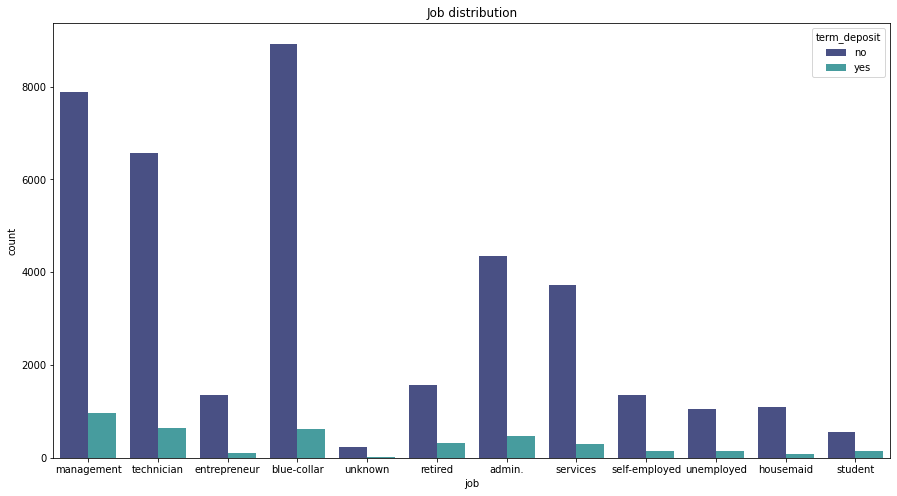

In [100]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

sns.countplot(x = 'job', data = df_train, hue = "term_deposit", palette = "mako")

plt.title("Job distribution");

**Observations**

- Maagement, technician, blue-collar, admin and services are the most reached, but do not subscribe that much. Some may be having housing loans because they have permanent jobs, hence are less likey to subscribe.
- The other groups should be focused on, as they are likely to subscribe.

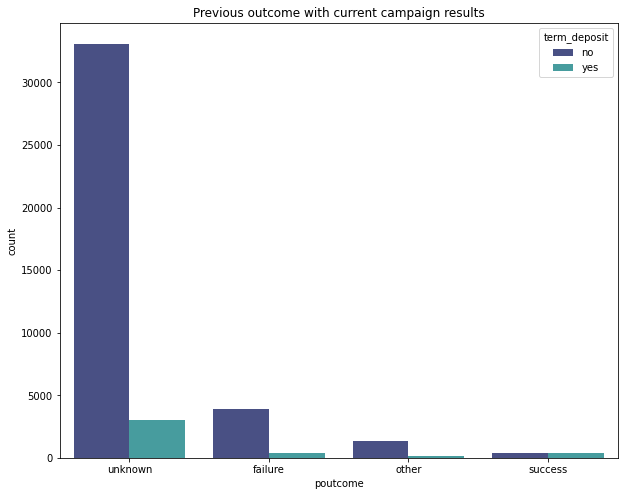

In [104]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

sns.countplot(x = 'poutcome', data = df_train, hue = "term_deposit", palette = "mako")

plt.title("Previous outcome with current campaign results")
plt.show();

**Observation**

- People who had subscribed from the previous campaign were most likely to subscribe. It could be worth keeping those clients. It may be good to give those customers some reward for referring other people to subscribe. Care must be taken to no lose these clients. 
- It is also not a bad choice to try again with those campaigns that failed. This may be that the client had a personal loan or had other debts.
- The unknown campaign results are worth investigating as to what the campaign results are because a lot of these clients do not subscribe to term deposit.

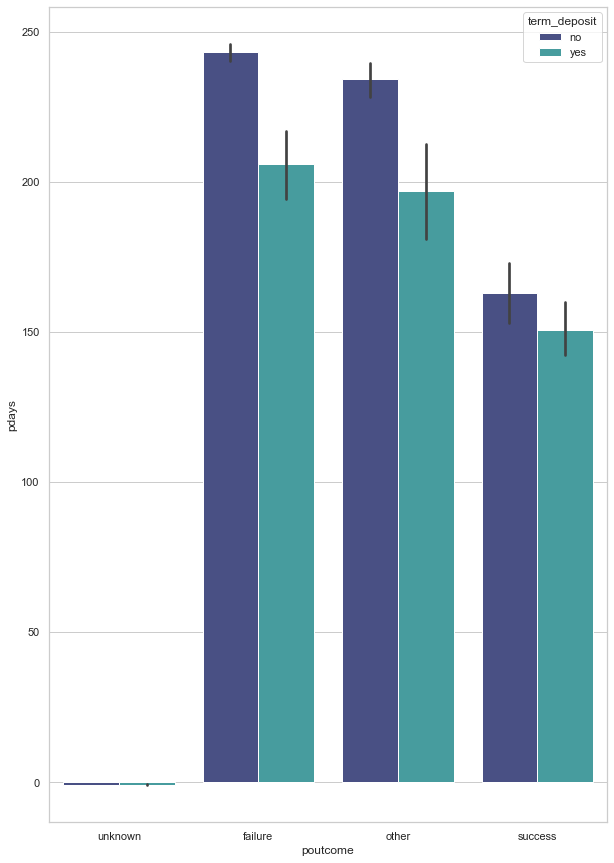

In [108]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.barplot(x = "poutcome", y="pdays", data=df_train, hue = 'term_deposit' , palette = "mako")

**Observations**

- People who have never been contacted before are likey to subscribe or not subscribe to the term deposit product.
- people who are contacted less that 150 days having subscribed during the previous campaign are likey to subscribe, this may be due to the fact that they are happy with their term deposit.

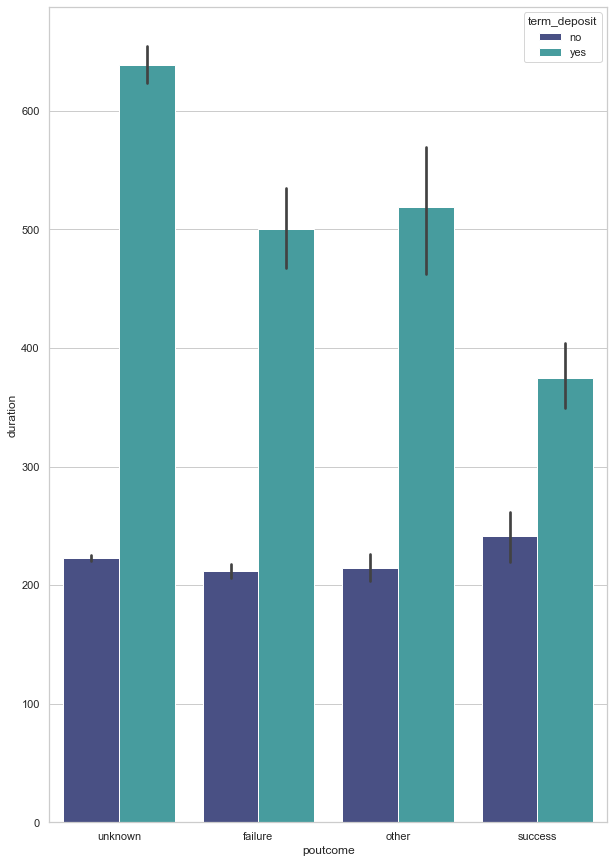

In [109]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.barplot(x = "poutcome", y="duration", data=df_train, hue = 'term_deposit' , palette = "mako")

**Observations**

- The duration  of calls are more than 200 seconds.
- We the unknown previous campaign outcome needs to be investigated, the call duration takes longer than the others for the others by almost 100 seconds for the clients who subscribed.

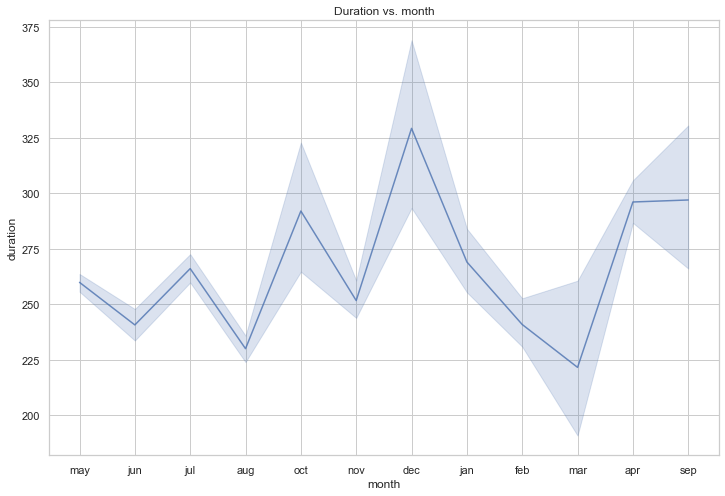

In [110]:
plt.figure(figsize=(12,8))
sns.lineplot(data = df_train, x = "month", y = "duration", alpha=0.8, sizes=(40,200))

plt.title("Duration vs. month")
plt.show()

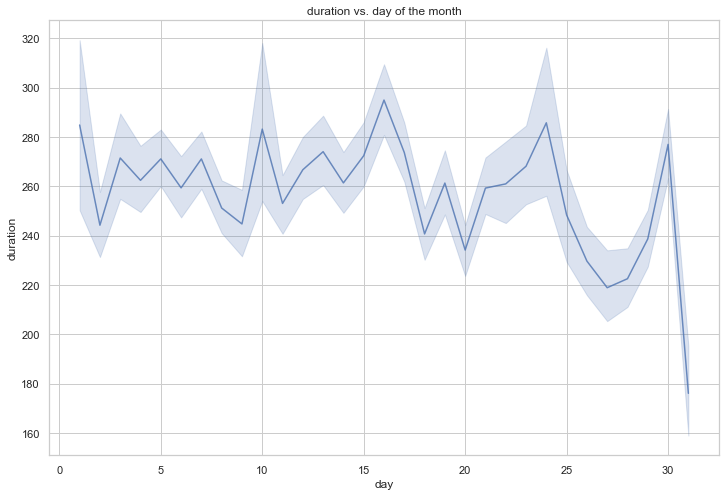

In [111]:
plt.figure(figsize=(12,8))
sns.lineplot(data = df_train, x = "day", y = "duration", alpha=0.8, sizes=(40,200))
plt.title("duration vs. day of the month")
plt.show()

<a id="features"></a>
## 5. **Feature engineering And Selection**

In [113]:
df_train.term_deposit.value_counts()

no     38678
yes     3961
Name: term_deposit, dtype: int64

- We see that the data is not balanced interms of class representation, but if:
    - We upsample, we risk overfitting because a lot of data will be repeated.
    - We downsample, we risk losing a lot of valuable information.
    - We don't balance the data, we risk a model being biased towards the overly represented class.
    
Hence we work with the data as is, we choose to have valuable information over losing it or introducing uncertainties.

In [ ]:
def label_transform(x):
    le = LabelEncoder()
    Encoded_le = le.fit_transform(x)
    return Encoded_le

<a id="model"></a>
## 6. **Model Building And Evaluation**

In [ ]:
# X and y

X = df_train[cols].drop('damage_grade', axis = 1)

y = df_train['damage_grade']

In [ ]:
# splitting data for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

####**MultilayerPerceptronClassifier**

Multilayer perceptron classifier (MLPC) is a classifier based on the feedforward artificial neural network. MLPC consists of multiple layers of nodes. Each layer is fully connected to the next layer in the network. Nodes in the input layer represent the input data. All other nodes map inputs to outputs by a linear combination of the inputs with the node’s weights w and bias b and applying an activation function. 

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

MLP = MLPClassifier(max_iter=300)
MLP.fit(X_train, y_train)

yt_preds = MLP.predict(X_test)

y_preds = MLP.predict(X_train)

print('The train f1_score for MLPClassifier is: {}'.format(f1_score(y_train, y_preds, average='micro')))
print('The test f1_score for MLPClassifier is: {}'.format(f1_score(y_test, yt_preds, average='micro')))

The train f1_score for MLPClassifier is: 0.5692796842451485
The test f1_score for MLPClassifier is: 0.568053619165782


####**GradientBoostingClassifier**
Gradient-boosted trees (GBTs) are a popular classification and regression method using ensembles of decision trees. A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility.
Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(n_estimators = 200, learning_rate = 1.0, max_depth = 5)
GBC.fit(X_train, y_train)

yt_preds = GBC.predict(X_test)

y_preds = GBC.predict(X_train)

print('The train f1_score for GBClassifier is: {}'.format(f1_score(y_train, y_preds, average ='micro')))
print('The test f1_score for GBClassifier is: {}'.format(f1_score(y_test, yt_preds, average = 'micro')))

The train f1_score for GBClassifier is: 0.8101633592807808
The test f1_score for GBClassifier is: 0.7228482623655365


####**Naive Bayes Classifier**

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. Bayes’ theorem states the following relationship, given class variable y  and dependent feature vector x_1
 through x_2.


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

yt_preds = gnb.predict(X_test)

y_preds = gnb.predict(X_train)

print('The train f1_score for GBClassifier is: {}'.format(f1_score(y_train, y_preds, average ='micro')))
print('The test f1_score for GBClassifier is: {}'.format(f1_score(y_test, yt_preds, average = 'micro')))

#++++++++++++++++++++++++++++++++=======================================================================



The train f1_score for GBClassifier is: 0.5666538756715273
The test f1_score for GBClassifier is: 0.5653675445440708


### **Random Forest Classifier**

Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
rfc = RandomForestClassifier(n_estimators=100, max_depth=5,
                                     random_state=0, class_weight="balanced")

#train the model 
rfc.fit(X_train, y_train)
#Validate The Model

#Predict on the valication data 
pred_rfc = rfc.predict(X_test)

print('F1 Score is: ', f1_score(y_test, pred_rfc, average= 'micro')) 


F1 Score is:  0.48802138627032143


### **Decision Trees Classifier**

Decision Trees are a type of Supervised Machine Learning (that is you explain what the input is and what the corresponding output is in the training data) where the data is continuously split according to a certain parameter. The tree can be explained by two entities, namely decision nodes and leaves.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

#train the model 
dtc.fit(X_train, y_train)
#Validate The Model

#Predict on the valication data 
pred_dtc = dtc.predict(X_test)

print('F1 Score is: ', f1_score(y_test, pred_dtc, average='micro')) 


F1 Score is:  0.6410892672132615


### **KNeighbors Classifier**

The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points on a graph.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

#train the model 
knn.fit(X_train, y_train)
#Validate The Model

#Predict on the valication data 
pred_knn = knn.predict(X_test)

print('F1 Score is: ', f1_score(y_test, pred_knn, average='micro')) 

F1 Score is:  0.4944679653624282


### **Linear SVC Model**

The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data. From there, after getting the hyperplane, you can then feed some features to your classifier to see what the "predicted" class is.

In [ ]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()

#train the model 
linear_svc.fit(X_train, y_train)
#Validate The Model

#Predict on the valication data 
pred_svc = linear_svc.predict(X_test)

print('F1 Score is: ', f1_score(y_test, pred_svc, average='micro')) 


F1 Score is:  0.5677978025351428


<a id="evaluation"></a>
## 7. **Model Parameter Tuning**

### **Load Testing Data**

In [ ]:
models = [MLP, GBC, gnb, rfc, dtc,knn,linear_svc]


In [ ]:

for i in range(0,len(models)):

  result_dict = {'building_id' : test_df['building_id'],
                 'damage_grade': models[i].predict(test_df[pred_cols])}

  results = pd.DataFrame(result_dict) # convert dictionary to dataframe

  results.to_csv('Results' + str(i) +'.csv', index = False) # write results to csv file

In [ ]:
target =  rfc.predict(test_data['damage_grade'])

NameError: ignored

In [ ]:
output.to_csv('Model1.csv', index= 'building_id')

<a id="conclusion"></a>
## 8. **Conclusion**

<a id="references"></a>
## 9. **References**

1. https://www.britannica.com/science/earthquake-geology

2. 